In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from curvemetrics.datafetcher import DataFetcher
from curvemetrics.metricsprocessor import MetricsProcessor
import timeit
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
from web3 import Web3
import matplotlib.pyplot as plt
from curvemetrics.datahandler import DataHandler
import json
from curvemetrics.queries import queries
import ccxt
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os

In [3]:
datahandler = DataHandler()
token_metadata = datahandler.get_token_metadata()
pool_metadata = datahandler.get_pool_metadata()
metricsprocessor = MetricsProcessor(pool_metadata, token_metadata)

pool = "0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7" # 3pool
# pool = '0xceaf7747579696a2f0bb206a14210e3c9e6fb269' # UST

start_ts, start_block = DataFetcher.get_block(datetime.fromisoformat("2023-02-01"))
end_ts, end_block = DataFetcher.get_block(datetime.fromisoformat("2023-04-01"))

In [14]:
metricsprocessor = MetricsProcessor(pool_metadata, token_metadata)

swaps_data = datahandler.get_swaps_data(pool, start_ts, end_ts)
lp_data = datahandler.get_lp_data(pool, start_ts, end_ts)
pool_data = datahandler.get_pool_data(pool, start_ts, end_ts)

# pool_metrics = metricsprocessor.process_metrics_for_pool(pool, pool_data, swaps_data, lp_data)

In [15]:
pool_data['approxTimestamp'] = pool_data['block'].apply(lambda x: datahandler.get_block_timestamp(x)[0]['timestamp'])
pool_data.index = pool_data['approxTimestamp'].apply(datetime.fromtimestamp)
pool_data.head()

,id,pool_id,block,totalValueLockedUSD,inputTokenBalances,inputTokenWeights,approxTimestamp
approxTimestamp,,,,,,,
2023-02-01 00:00:11,26230078,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530248,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209611
2023-02-01 00:00:23,26318496,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530249,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209623
2023-02-01 00:00:35,26318498,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530250,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209635
2023-02-01 00:00:47,26318429,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530251,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209647
2023-02-01 00:00:59,26318451,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530252,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209659


In [16]:
datafetcher = DataFetcher(token_metadata=token_metadata)
virtual_price_data = datafetcher.get_virtual_price(start_block, end_block, pool, step_size=1000)

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7f2591299360>


In [17]:
df = pd.DataFrame.from_dict([x for y in virtual_price_data for x in y])
df['virtualPrice'] = df['virtualPrice'].astype(int)
df = df.sort_values(by='block')
df['approxTimestamp'] = df['block'].apply(lambda x: datahandler.get_block_timestamp(x)[0]['timestamp'])
df.index = df['approxTimestamp'].apply(datetime.fromtimestamp)
df.head()

,virtualPrice,pool_id,block,approxTimestamp
approxTimestamp,,,,
2023-02-01 00:00:11,1023627320481699347,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530248,1675209611
2023-02-01 03:20:59,1023636741510398534,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16531248,1675221659
2023-02-01 06:42:11,1023636741510398534,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16532248,1675233731
2023-02-01 10:03:35,1023636741510398534,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16533248,1675245815
2023-02-01 13:24:59,1023636741510398534,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16534248,1675257899


In [18]:
def calc_virtual_price(row):
    dai_balance, usdc_balance, usdt_balance = row['inputTokenBalances']
    return (dai_balance + usdc_balance*1e12 + usdt_balance * 1e12)/(row['totalValueLockedUSD']*1e18)
pool_data['virtualPrice'] = pool_data.apply(calc_virtual_price, axis=1)
pool_data.head()

,id,pool_id,block,totalValueLockedUSD,inputTokenBalances,inputTokenWeights,approxTimestamp,virtualPrice
approxTimestamp,,,,,,,,
2023-02-01 00:00:11,26230078,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530248,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209611,1.023638
2023-02-01 00:00:23,26318496,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530249,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209623,1.023638
2023-02-01 00:00:35,26318498,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530250,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209635,1.023638
2023-02-01 00:00:47,26318429,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530251,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209647,1.023638
2023-02-01 00:00:59,26318451,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530252,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209659,1.023638


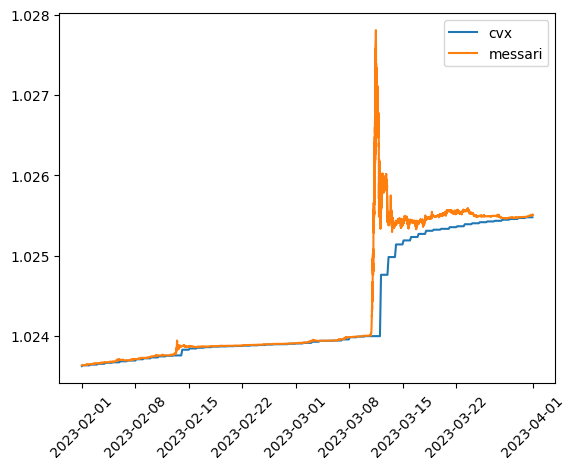

In [19]:
f, ax = plt.subplots()
ax.plot(df.index, df['virtualPrice']/1e18, label='cvx')
ax.plot(pool_data.index, pool_data['virtualPrice'], label='messari')
ax.legend()
ax.tick_params(axis='x', rotation=45)

In [31]:
pool_data.head()

,id,pool_id,block,totalValueLockedUSD,inputTokenBalances,inputTokenWeights,approxTimestamp,virtualPrice
approxTimestamp,,,,,,,,
2023-02-01 00:00:11,26230078,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530248,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209611,1.023638
2023-02-01 00:00:23,26318496,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530249,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209623,1.023638
2023-02-01 00:00:35,26318498,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530250,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209635,1.023638
2023-02-01 00:00:47,26318429,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530251,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209647,1.023638
2023-02-01 00:00:59,26318451,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16530252,5.446427e+08,"[195893429813855888940119779, 189915532290792,...","[35.136780360113306, 34.064543927871796, 30.79...",1675209659,1.023638


: 

In [24]:
lp_supply = lp_data[['totalSupply', 'timestamp']]
lp_supply.index = lp_supply['timestamp'].apply(datetime.fromtimestamp)
lp_supply = lp_supply.resample('1min').last().fillna(method='ffill')['totalSupply']
lp_supply.head()

timestamp
2023-02-01 00:09:00    5.446390e+26
2023-02-01 00:10:00    5.446390e+26
2023-02-01 00:11:00    5.446390e+26
2023-02-01 00:12:00    5.446390e+26
2023-02-01 00:13:00    5.446390e+26
Freq: T, Name: totalSupply, dtype: float64

In [25]:
pool_df = pool_data['inputTokenBalances'].resample('1min').last()
pool_df = pd.merge(pool_df, lp_supply, how='left', left_index=True, right_index=True).fillna(method='ffill').fillna(method='bfill')
pool_df.head()

,inputTokenBalances,totalSupply
approxTimestamp,,
2023-02-01 00:00:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26
2023-02-01 00:01:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26
2023-02-01 00:02:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26
2023-02-01 00:03:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26
2023-02-01 00:04:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26


In [28]:
def calc_virtual_price(row):
    dai_balance, usdc_balance, usdt_balance = row['inputTokenBalances']
    return (dai_balance + usdc_balance*1e12 + usdt_balance * 1e12)/(row['totalSupply'])
def calc_sum_reserves(row):
    dai_balance, usdc_balance, usdt_balance = row['inputTokenBalances']
    return (dai_balance + usdc_balance*1e12 + usdt_balance * 1e12)

pool_df['virtualPrice'] = pool_df.apply(calc_virtual_price, axis=1)
pool_df['sumReserves'] = pool_df.apply(calc_sum_reserves, axis=1)
pool_df

,inputTokenBalances,totalSupply,virtualPrice,sumReserves
approxTimestamp,,,,
2023-02-01 00:00:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26,1.023644,5.575167e+26
2023-02-01 00:01:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26,1.023644,5.575167e+26
2023-02-01 00:02:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26,1.023644,5.575167e+26
2023-02-01 00:03:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26,1.023644,5.575167e+26
2023-02-01 00:04:00,"[195893429813855888940119779, 189915532290792,...",5.446390e+26,1.023644,5.575167e+26
...,...,...,...,...
2023-03-31 23:56:00,"[163167427484065195478451971, 179840437373564,...",4.280819e+26,1.025510,4.390024e+26
2023-03-31 23:57:00,"[163167427484065195478451971, 179840437373564,...",4.280819e+26,1.025510,4.390024e+26
2023-03-31 23:58:00,"[163167427484065195478451971, 179840437373564,...",4.280819e+26,1.025510,4.390024e+26


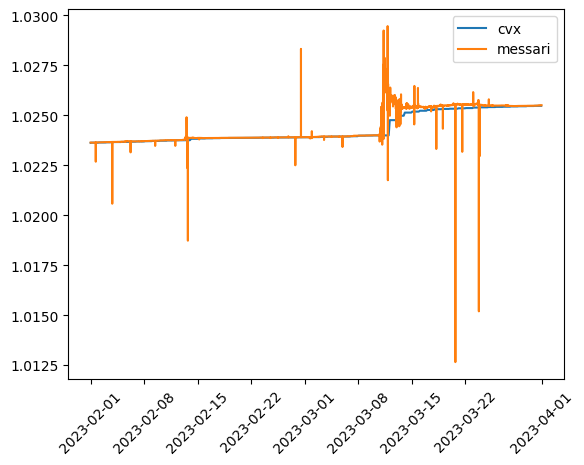

In [30]:
f, ax = plt.subplots()
ax.plot(df.index, df['virtualPrice']/1e18, label='cvx')
ax.plot(pool_df.index, pool_df['virtualPrice'], label='messari')
ax.legend()
ax.tick_params(axis='x', rotation=45)

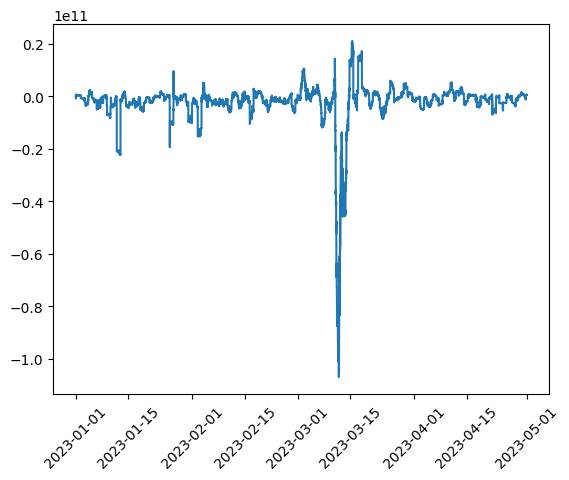

In [66]:
f, ax = plt.subplots()

roller = pool_metrics['USDC.netLPFlow'].rolling('1d').mean()
ax.plot(roller.index, roller)

ax.tick_params(axis='x', rotation=45)

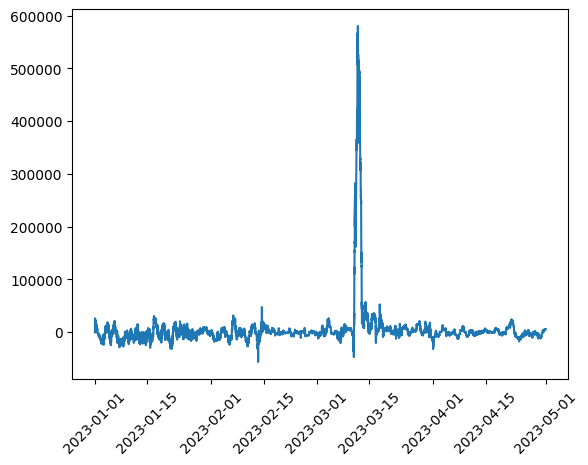

In [67]:
f, ax = plt.subplots()

roller = pool_metrics['USDC.netSwapFlow'].rolling('1d').mean()
ax.plot(roller.index, roller)

ax.tick_params(axis='x', rotation=45)

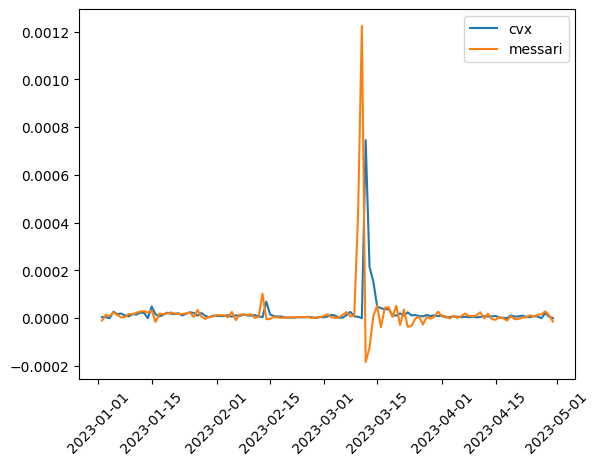

: 

In [27]:
f, ax = plt.subplots()
cvx_returns = (df['virtualPrice']/1e18).resample('1d').last().pct_change()
messari_returns = pool_data['virtualPrice'].resample('1d').last().pct_change()
ax.plot(cvx_returns.index, cvx_returns, label='cvx')
ax.plot(messari_returns.index, messari_returns, label='messari')
ax.legend()
ax.tick_params(axis='x', rotation=45)

approxTimestamp
2023-01-01 00:00:00             NaN
2023-01-01 00:01:00    0.000000e+00
2023-01-01 00:02:00   -1.462575e-11
2023-01-01 00:03:00    0.000000e+00
2023-01-01 00:04:00    1.368175e-09
                           ...     
2023-04-30 23:56:00    0.000000e+00
2023-04-30 23:57:00    0.000000e+00
2023-04-30 23:58:00    0.000000e+00
2023-04-30 23:59:00    0.000000e+00
2023-05-01 00:00:00    0.000000e+00
Freq: T, Name: virtualPrice, Length: 172801, dtype: float64